<a href="https://colab.research.google.com/github/bindhu289084/CodeInnovationSeries-CMRIT/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
x_train[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  36, 146, 254, 255, 251,  95,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
def visualize_input(img, ax):
  ax.imshow(img,cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(x,y),
                  horizontalalignment='center' ,
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')

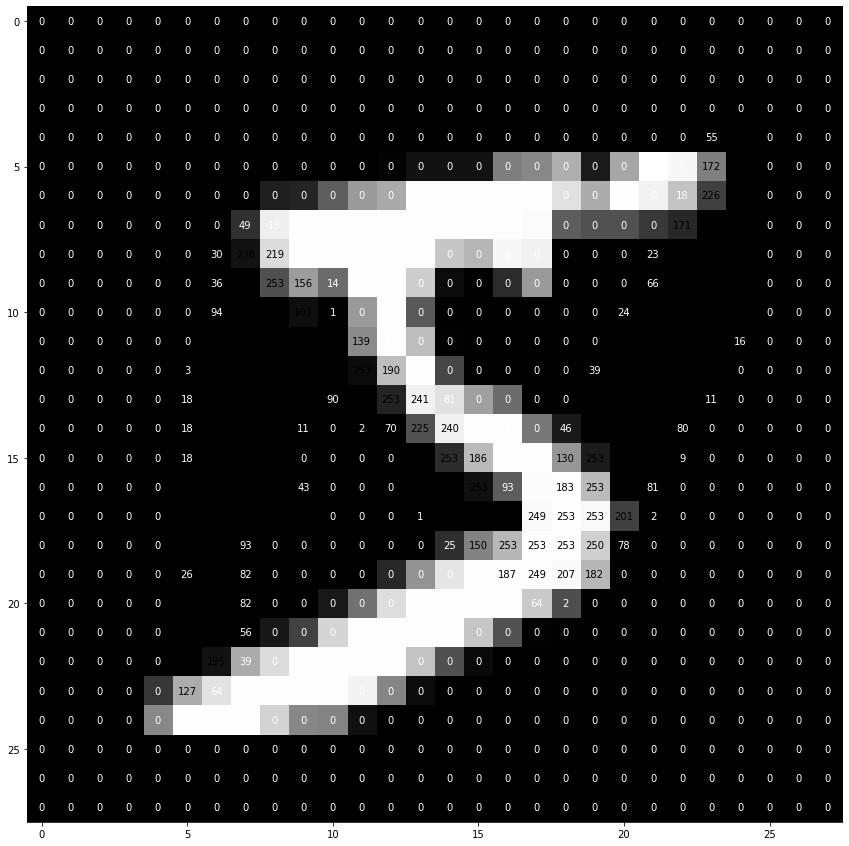

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
visualize_input(x_train[0],ax)
plt.show()

In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
label = "0 1 2 3 4 5 6 7 8 9"
label = label.split()
label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

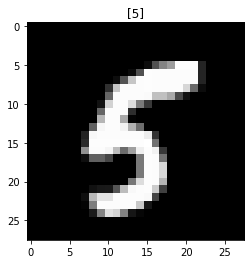

In [ ]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray')
plt.title([y_train[i]])
plt.show()

In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

<function matplotlib.pyplot.show>

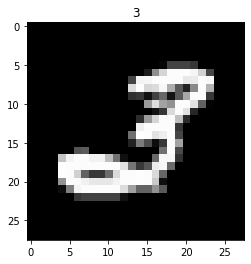

In [ ]:
#normalization
x_train = x_train/255
x_test = x_test/255
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray')
plt.title(label[y_train[i]])
plt.show

In [ ]:
#After normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
# NN Architecture
#classification - multiclass;10
#Activation function(output):softmax
#since we have images(matrix format) we use flatten as input layer


#loss function : 
from keras.utils import to_categorical
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
to_categorical(x_train)[0]

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4030 - accuracy: 0.8827 - val_loss: 0.1279 - val_accuracy: 0.9618
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1008 - accuracy: 0.9716 - val_loss: 0.0934 - val_accuracy: 0.9726
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0856 - val_accuracy: 0.9741
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0844 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.0986 - val_accuracy:

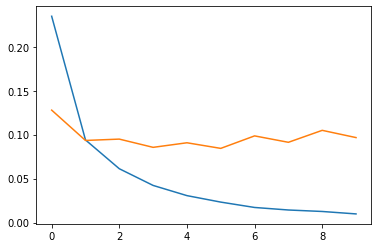

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

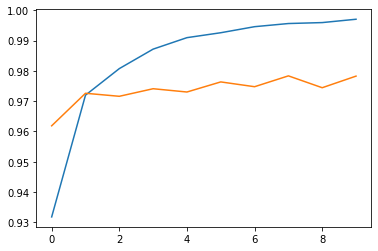

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#Evaluate of test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 974,    0,   10,    1,    2,    2,    6,    0,    6,    3],
       [   1, 1128,    2,    0,    2,    0,    3,    2,    1,    2],
       [   0,    1,  990,    4,    4,    0,    1,    5,    1,    1],
       [   1,    2,    4,  990,    1,    9,    1,    4,    5,    1],
       [   1,    0,    3,    0,  964,    1,    5,    0,    2,   11],
       [   0,    1,    0,    4,    0,  870,    6,    0,    3,    1],
       [   1,    2,    1,    0,    1,    1,  934,    0,    1,    0],
       [   1,    0,   11,    3,    1,    1,    0, 1010,    3,    7],
       [   1,    1,   11,    4,    0,    4,    2,    3,  949,    0],
       [   0,    0,    0,    4,    7,    4,    0,    4,    3,  983]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1004
           1       0.99      0.99      0.99      1141
           2       0.96      0.98      0.97      1007
           3       0.98      0.97      0.98      1018
           4       0.98      0.98      0.98       987
           5       0.98      0.98      0.98       885
           6       0.97      0.99      0.98       941
           7       0.98      0.97      0.98      1037
           8       0.97      0.97      0.97       975
           9       0.97      0.98      0.98      1005

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
accuracy_score(y_pred,y_test)

0.9792

In [ ]:

# saving the model: .h5 / .hdf5
model.save('mnist.hdf5')


In [ ]:
# weights and bias